### Room number and price of squaremeter

## H0
Room and price of squaremeter are independent

## H1
Room and price of squaremeter are dependent

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [3]:
data = pd.read_csv('house_prices_fixed.csv',decimal=',')

In [4]:
data['price_category'] = list(map(lambda x: 'expensive' if x > 83405 else 'cheap',data['price_per_squaremeter']))

In [19]:
data_crosstab = pd.crosstab(data['price_category'],  data['room_number'], margins = False)

In [20]:
data_crosstab

room_number,1 rum,"1,5 rum",2 rum,"2,5 rum",3 rum,"3,5 rum",4 rum
price_category,,,,,,,
cheap,4,5,85,5,28,3,3
expensive,25,11,43,1,15,0,8


In [21]:
contigency_pct = pd.crosstab(data['price_category'],  data['room_number'], normalize='index')

In [22]:
contigency_pct

room_number,1 rum,"1,5 rum",2 rum,"2,5 rum",3 rum,"3,5 rum",4 rum
price_category,,,,,,,
cheap,0.030075,0.037594,0.639098,0.037594,0.210526,0.022556,0.022556
expensive,0.242718,0.106796,0.417476,0.009709,0.145631,0.000000,0.077670


<AxesSubplot:xlabel='room_number', ylabel='price_category'>

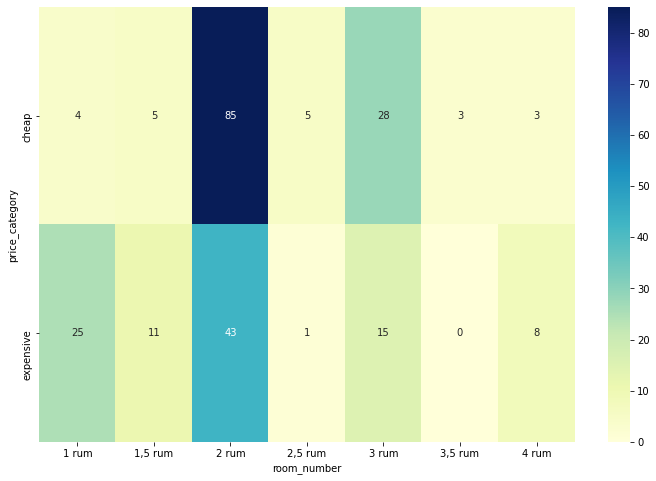

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(data_crosstab, annot=True, cmap="YlGnBu")

In [24]:
stat, p, dof, expected = chi2_contingency(data_crosstab)

In [25]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


In [26]:
p

4.681342421871192e-07